## Coulomb's  law for a one-dimensional source:

### Field from a uniformly charged circle.  See Griffiths problem 2.5 for on-axis result.

Using the notation of Griffiths, the electric field at observation point ${\bf r}$ due to a one-dimensional charge
distribution is

$$
{\bf E}({\bf r}) = \frac{1}{4\pi\epsilon_0}\, \int\frac{{\bf s}}{s^3}\,  \lambda({\bf r}^\prime)\, d\ell^\prime,
\tag{1}
$$

where $\lambda$ Is the linear charge density of the 1-d source, $d\ell^\prime$ is an infinitesimal length along the 1-d source, 
and ${\bf s}$ is a stand-in for Griffiths' 'script-r'-vector from source point $dq=\lambda\, d\ell^\prime$ at position ${\bf r}^\prime$ to the observation point at ${\bf r}$:

\begin{equation}
{\bf s} \equiv {\bf r} - {\bf r}^\prime.
\tag{2}
\end{equation}

Equation (1) is just Griffiths Eq. (2.6), with the substitution

$$
\frac{\hat{\bf s}}{s^2} \longrightarrow \frac{\bf s}{s^3}.
\tag{3}
$$

For 1-d sources it is appropriate to parametrize the path in terms of a single scalar 
variable which I call $t$ (recall that 'primed' variables do not imply differentials):

$$
{\boldsymbol \ell}^\prime(t) =   
x^\prime(t)\, \hat{{\bf x}}
+ y^\prime(t)\, \hat{{\bf y}}
+ z^\prime(t)\, \hat{{\bf z}},
\tag{4}
$$

so 
$$
{\bf s} \longrightarrow {\bf r} -  {\boldsymbol \ell}^\prime(t),
\tag{5}
$$

and the linear charge density becomes

$$
\lambda \longrightarrow \lambda(t).
\tag{6}
$$

We also have

$$ 
d{\boldsymbol \ell}^\prime = \left(
\frac{dx^\prime}{dt}\, \hat{\bf x} + 
\frac{dy^\prime}{dt}\, \hat{\bf y} + 
\frac{dz^\prime}{dt}\, \hat{\bf z}\right)\, dt
\tag{7}
$$

which gives

$$
d\ell^\prime = \sqrt{\left(\frac{dx^\prime}{dt}^2 + \frac{dy^\prime}{dt}^2 + 
\frac{dz^\prime}{dt}^2\right)}\, dt
\tag{8}
$$

It is convenient to work with dimensionless parameters defined in terms of some  length
$R$ and charge $Q$ characterizing the source:

$$
{\bf r}^\ast \equiv \frac{\bf r}{R} \quad\quad {\boldsymbol \ell}^\ast \equiv \frac{\boldsymbol \ell}{R}\quad\quad 
{\bf s}^\ast \equiv \frac{\bf s}{R}\quad\quad \lambda^\ast = \frac{\lambda}{Q/R}\quad\quad 
\mbox{and} \quad\quad{\bf E}^\ast \equiv \frac{{\bf E}}{Q/(4\pi \epsilon_0 R^2)}.
\tag{9}
$$

Coulomb's law for 1-d sources written in terms of these parameters is 

\begin{eqnarray*}
{\bf E}^\ast &=& \int \frac{{\bf s}^\ast}{{s^\ast}^3}\lambda^\ast\, d{l^\prime}^\ast \\
               &=& \int_{t_1}^{t_2} \frac{{\bf s}^\ast}{{s^\ast}^3} \lambda^\ast(t)\, 
               \sqrt{\left(\frac{d{x^\prime}^\ast}{dt}^2 + \frac{d{y^\prime}^\ast}{dt}^2 + 
\frac{d{z^\prime}^\ast}{dt}^2\right)}\, dt
\tag{10}
\end{eqnarray*}

This is really three separate integrals, one for each component.

All calculations in what follows will be in terms of dimensionless variables, asterisks will 
be implicit. The dimensional electric  
field can be recovered by multiplying the numerical results below by the factor $Q/(4\pi\epsilon_0 R^2)$.

This notebook uses the <code>quad_vec</code> method from the <code>integrate</code> submodule of <code>scipy</code>
for numerical integration.  There are other choices, but this works well (and I like to use <code>scipy</code>
tools when they're available).


Marty Ligare, November 2022, March 2024

In [1]:
import numpy as np
from scipy import integrate

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# %matplotlib notebook # Use this for notebooks before Notebook 7
                       # If used in Notebook 7, graphics calls return "Javascript Error: IPython is not defined"
                       #
                       # Use  following for Notebook 7. See https://github.com/jupyter/notebook/issues/7115
%matplotlib widget     

mpl.style.use('classic')

# M.L. modifications of matplotlib defaults using syntax of v.2.0
# More info at http://matplotlib.org/2.0.0/users/deflt_style_changes.html
# Changes can also be put in matplotlibrc file, or effected using mpl.rcParams[]
plt.rc('figure', figsize=(6, 4.5))            # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
# Adjusts supblot parameters for new size
plt.rc('figure', autolayout=True)

## Source-independent functions
### These functions do not have to be modfified for different 1-d charge distributions
Vectors will be represented with `numpy` arrays.

In [3]:
def integrand(t, x, y, z):
    '''
    Integrand of Eq. (10) above.
    Inputs are  1) the parameter "t" used in Eqs. (4-8) above, and the cartesian coordinates x, y, and z of the obesrvation
    point. Individual cartesion coordinats are used (rather than an array representing a vector, for ease of passing as 'args'
    for the numerical integration done by scipy's integrate.quad_vec().
    Return is an infinitesimal vector field element represented in a numpy array (with cartesian coordinates as its elements).
    '''
    r = np.array([x,y,z])  # numpy array representing observation point vector
    s = r - l(t)           # numpy array representing vector from source point to observation point.
    dE = s/np.dot(s,s)**(3/2)*lam(t)*np.sqrt( np.dot(dl(t),dl(t)) )
    return dE              # infinitesimal field vector returned as numpy array

def e(r):
    '''
    Numerical integration of Eq. (10) above.
    Input is a numpy array representing the observation point vector.
    Return value is the vector field represented as a numpy array (with cartesian coordinates as its elements).
    '''
    
    a = integrate.quad_vec(integrand, t1, t2, args=tuple(r))
    return(a[0])

def ex(x, y, z):
    '''
    Isolation of the x-component of the vector field returned by function e(r).
    This is useful when creating meshgrids necessary for use in matplotlib plotting of field vectors.
    '''
    r = np.array([x,y,z])
    return e(r)[0]

def ey(x, y, z):
    '''
    Isolation of the y-component of the vector field returned by function e(r).
    This is useful when creating meshgrids necessary for use in matplotlib plotting of field vectors.
    '''
    r = np.array([x,y,z])
    return e(r)[1]

def ez(x, y, z):
    '''
    Isolation of the z-component of the vector field returned by function e(r).
    This is useful when creating meshgrids necessary for use in matplotlib plotting of field vectors.
    '''
    r = np.array([x,y,z])
    return e(r)[2]

### Circle of charge; extending Griffiths Problem 2.5

#### Characterizing the source
Charge $Q$ uniformly distributed on a ring of radius $R$ in the $x$-$y$ plane.  An obvious choices for the  
characteristic length and charge is $R$ and $Q$.
One way to parametrize of charge (in dimensionless variables) is

$$ 
{\boldsymbol \ell}(t) = \cos(\pi t)\,  \hat{{\bf x}} + \sin(\pi t)\, \hat{\bf y}\quad\quad\mbox{for $t=0 \longrightarrow 2$},
\tag{11}
$$

giving 

$$
d{\boldsymbol \ell} = \left[-\pi \sin(\pi t) dt\, \hat{\bf x} + \pi \cos(\pi t)\, \hat{{\bf y}} \right]\, dt.
\tag{12}
$$

The dimensionless charge density is 

$$ 
\lambda^\ast = \frac{\lambda}{Q/R} = \frac{Q/2\pi R}{Q/R} = \frac{1}{2\pi}.
\tag{13}
$$

<b>NOTE:</b> In this example, `coulomb_1D_circle_1`, it is easy to determine $d{\boldsymbol \ell}$ " by hand" and include 
this in the code.  In a later 
version of solving the same problem, `coulomb_1D_circle_2`, I will numerically calculate  $d{\boldsymbol \ell}$ using 
tools from the <code>numdifftools</code> package.  (For an an intro 
to <code>numdifftools</code> see the webpage https://www.eg.bucknell.edu/~phys310/jupyter/numdiff.html, or, in Jupyter notebook form, https://www.eg.bucknell.edu/~phys310/jupyter/numdiff.ipynb.)

## Python functions that characterize the source
### These functions do need to be modified for different sources


In [4]:
# limits for the paramter t; see Eqs. (11&12) above
t1 = 0
t2 = 2

def l(t):
    '''
    Parameterization of linear charge distribution position vector
    See Eq. (11) above.
    '''
    lx = np.cos(np.pi*t)
    ly = np.sin(np.pi*t)
    lz = 0
    return np.array([lx, ly, lz])

def dl(t):
    '''Coefficients in differential vector line element.
    See Eq. (12) above.
    '''
    dlx = -np.pi*np.sin(np.pi*t)
    dly = np.pi*np.cos(np.pi*t)
    dlz = 0
    return np.array([dlx, dly, dlz])

def lam(t):
    '''
    Linear charge density.
    See Eq. (13) above.
    '''
    return 1/2/np.pi

## Comparing analytical and computational results for on-axis field
#### Computational result for non-dimensional point (0,0,1)

In [5]:
r = np.array([0,0,1])
e(r)

array([ 1.38777878e-17, -1.38777878e-17,  3.53553391e-01])

#### Comparison with analytical result for on-axis field

Computational non-dimensional ${\bf E}$:

$$
{\bf E}^\ast \simeq 0.353555\, \hat{\bf z}
$$ 

Computational dimensional field:
$$
{\bf E} \simeq \frac{Q}{4\pi\epsilon_0 R^2} \times {\bf E}^\ast = \frac{Q}{4\pi\epsilon_0 R^2}\times 0.35355\, \hat{\bf z}
$$

Analytical result (solution of Griffiths problem 2.5):
$$
{\bf E}(0,0,z) = \frac{1}{4\pi\epsilon_0}\, \frac{\lambda (2\pi R) z}{(R^2 + z^2)^{3/2}} \, \hat{\bf z}
        = \frac{1}{4\pi\epsilon_0 R^3}\, \frac{Q z}{(1 + (z/R)^2)^{3/2}} \, \hat{\bf z}
$$



Non-dimensional $z^\ast = 1$ $\longrightarrow$ $z = R$, so the analytical result for this point is 

$$
{\bf E}(0,0,R) = \frac{Q}{4\pi\epsilon_0 R^2}\, \frac{1}{{2}^{3/2}} \, \hat{\bf z} \simeq \frac{Q}{4\pi\epsilon_0 R^2}\, 0.353555\, \hat{\bf z}
$$



## Visualizing the vector field (including off-axis)

In [6]:
z = np.linspace(1,3,3)
x = np.linspace(-2,2,5)
X, Z = np.meshgrid(x,z)

vec_ex = np.vectorize(ex)
vec_ez = np.vectorize(ez)
U, W = vec_ex(X, 0, Z), vec_ez(X, 0, Z)

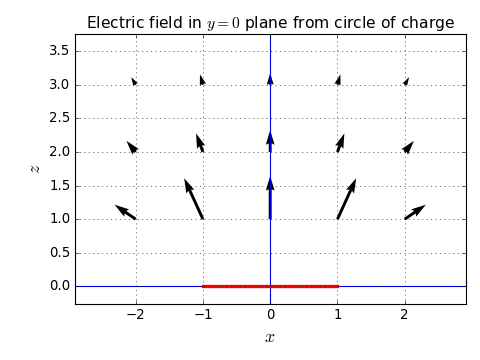

In [7]:
plt.figure()
plt.quiver(X, Z, U, W)
plt.axis('equal')
plt.axhline(0)
plt.axvline(0)
plt.xlabel('$x$')
plt.ylabel('$z$')
plt.title('Electric field in $y=0$ plane from circle of charge')
xs = np.linspace(-1, 1, 2)
ys = 0*xs
plt.plot(xs, ys, color='r', lw = 3)
plt.ylim(-.5,4)
plt.grid()

### Version Information 
`version_information` is from J.R. Johansson (jrjohansson at gmail.com)<br>
See Introduction to scientific computing with Python:<br>
http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb <br>
for more information and instructions for package installation.<br>

If `version_information` has been installed system wide (as it has been on Bucknell linux computers with shared file systems), continue with next cell as written.  If not, comment out top line in next cell and uncomment the second line.

In [8]:
%load_ext version_information

#%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py

In [9]:
version_information numpy, scipy, numdifftools, matplotlib

Software versions
Python 3.11.7 64bit [GCC 11.2.0]
IPython 8.20.0
OS Linux 4.9.0 9 amd64 x86_64 with glibc2.28
numpy 1.26.4
scipy 1.11.4
numdifftools 0.9.41
matplotlib 3.8.0
Sun Apr 07 19:27:36 2024 EDT